In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using CSV, DataFrames
using StatsPlots

In [80]:
pdir = mkpath(plotsdir("UPsubsetMSAs"))

"/Users/ben/projects/Doran_etal_2022/plots/UPsubsetMSAs"

In [2]:
df = CSV.read(projectdir("_research", "UPsubsetMSAs", "timeperjob.log"), DataFrame, delim="\t")

,Seq,Host,Starttime,JobRuntime,Send,Receive,Exitval,Signal,Command
,Int64,String1,Float64,Float64,Int64,Int64,Int64,Int64,String
1,11,:,1.66077e9,12.075,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runFastME.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=25_level\\=Genus_group\\=Ruminococcus_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/t25 -m JC69 --nboot 100 > /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/UPsubset_taxa\\=25_level\\=Genus_group\\=Ruminococcus_alphabet\\=AT.phy.out
2,12,:,1.66077e9,15.401,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runFastME.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=50_level\\=Family_group\\=Rhodospirillaceae_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/t50 -m JC69 --nboot 100 > /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/UPsubset_taxa\\=50_level\\=Family_group\\=Rhodospirillaceae_alphabet\\=AT.phy.out
3,9,:,1.66077e9,36.002,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runFastME.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=103_level\\=Order_group\\=Oceanospirillales_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/t103 -m JC69 --nboot 100 > /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runFastME/UPsubset_taxa\\=103_level\\=Order_group\\=Oceanospirillales_alphabet\\=AT.phy.out
4,3,:,1.66077e9,65.94,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runSPI.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=25_level\\=Genus_group\\=Ruminococcus_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI/t25 -m JC69 --nboot 100 > /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI/UPsubset_taxa\\=25_level\\=Genus_group\\=Ruminococcus_alphabet\\=AT.phy.out
5,4,:,1.66077e9,67.507,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runSPI.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=50_level\\=Family_group\\=Rhodospirillaceae_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI/t50 -m JC69 --nboot 100 > /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI/UPsubset_taxa\\=50_level\\=Family_group\\=Rhodospirillaceae_alphabet\\=AT.phy.out
6,1,:,1.66077e9,83.168,0,0,0,0,srun -n1 --cpus-per-task 7 mkdir -p /home/bend/scratchspace/projects/Doran_etal_2022/_research/UPsubsetMSAs_v3/runSPI && julia --threads=7 /home/bend/scratchspace/projects/Doran_etal_2022/scripts/slurm/runners/runSPI.jl -i /home/bend/scratchspace/projects/Doran_etal_2022/data/exp_pro/UPsubsetMSAs/UPsubset_taxa\\=103_level\\=Order_group\\=Oceanospirillales_alphabet\\=AT.phy -o /home/bend/scratchspace/projects/Dora

In [8]:
pltdf = sort(df, :Seq) |>
    df->filter(:Exitval=> ==(0), df);

In [25]:
replace(pltdf.Command[1], r"(.*)((?<=runners\/run)[a-zA-Z]*)(.*)"=>s"\2")

"SPI"

In [9]:
r"(.*)((<=?\/t)[0-9*](==?\s))(.*)"

r""

In [27]:
pltdf = pltdf |>
    df->transform(df, :Command=>(x->replace.(x, r"(.*)((?<=\/t)[0-9]*)(.*)"=>s"\2"))=> :Ntaxa ) |>
    df->transform(df, :Command=>(x->replace.(x, r"(.*)((?<=runners\/run)[a-zA-Z]*)(.*)"=>s"\2"))=> :method);

In [38]:
pdf = pltdf[:, [:method, :Ntaxa, :JobRuntime]];
pdf.Ntaxa = parse.(Int, pdf.Ntaxa);
pdf = sort(pdf, [:method, :Ntaxa]);

In [39]:
pdf

,method,Ntaxa,JobRuntime
,String,Int64,Float64
1,FastME,25,12.075
2,FastME,50,15.401
3,FastME,103,36.002
4,FastME,211,142.682
5,FastTree,25,883.487
6,FastTree,50,2011.95
7,FastTree,103,4044.1
8,FastTree,211,6906.7
9,MrBayes,25,728.282


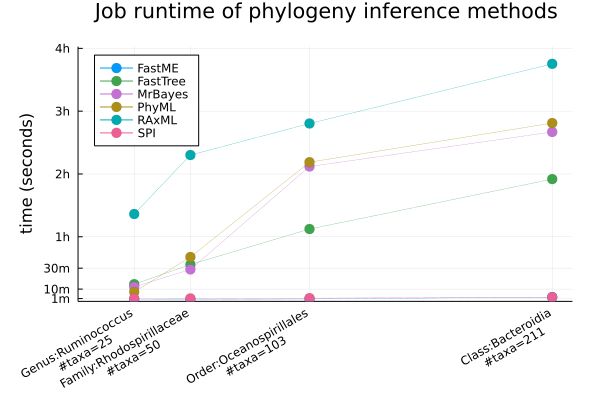

In [81]:
plot(title="Job runtime of phylogeny inference methods",
    ylabel="time (seconds)",
    yticks=([60, 600, 1800, 3600, 7200, 10800, 14400], ["1m", "10m", "30m", "1h", "2h", "3h", "4h"]),
    xticks=([25, 50, 103, 211], [
        "Genus:Ruminococcus\n #taxa=25",
        "Family:Rhodospirillaceae\n #taxa=50",
        "Order:Oceanospirillales\n #taxa=103",
        "Class:Bacteroidia\n #taxa=211",
         ]),
    xrotation=30,
    margin=5Plots.Measures.mm,
    ylims=(-100, 14500),
    xlims=(0, 220),
    legend=:topleft,
)
@df pdf plot!(:Ntaxa, :JobRuntime, group=:method, markers=true,
    linewidth=0.25,
    markersize=6,
    markerstrokewidth=0,
    c=permutedims(vcat([1],3:7)))

In [82]:
savefig(joinpath(pdir, "Jobruntime_for_all_methods_on_different_Ntaxa.pdf"))

In [51]:
60 * 60 * 4

14400